# Root Insurance

In [1]:
import pandas as pd
import numpy as np
import warnings
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
root_ins_df = pd.read_csv('Root_Insurance_data.csv')

In [3]:
root_ins_df.head()

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0


In [4]:
train_data, test_data = train_test_split(root_ins_df,
                                         stratify=root_ins_df['policies_sold'],
                                         test_size=0.33,
                                        random_state=123)

In [5]:
# scatter matrix not very useful here
# scatter_matrix(train_data.loc[:,train_data.columns != 'click'],figsize=(10,10))

# dividing the training data into succesful and unsuccesful bids for plotting
# 'click_int' is simply the 'click' column as an int
succesful_bids_df = train_data[train_data['policies_sold'] == 1].copy()
unsuccesful_bids_df = train_data[train_data['policies_sold'] == 0].copy()
unsuccesful_bids_df['click_int'] = 0
unsuccesful_bids_df.loc[unsuccesful_bids_df['click'] == True,'click_int'] = 1
unsuccesful_bids_df.loc[unsuccesful_bids_df['click'] == True,'click_int'] = 1
succesful_bids_df['click_int'] = 0
succesful_bids_df.loc[succesful_bids_df['click'] == True,'click_int'] = 1
succesful_bids_df.loc[succesful_bids_df['click'] == True,'click_int'] = 1

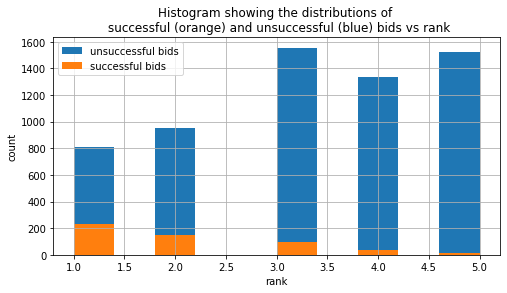

In [6]:
plt.figure(figsize=(8,4))
unsuccesful_bids_df['rank'].hist(label='unsuccessful bids')
succesful_bids_df['rank'].hist(label='successful bids')
plt.xlabel('rank')
plt.ylabel('count')
plt.title('Histogram showing the distributions of \n successful (orange) and unsuccessful (blue) bids vs rank')
plt.legend()

As expected, a larger proportion of the higher rank bids are succesful.

In [7]:
# Click distribution by rank
click_dist_by_rank = pd.DataFrame(index=[1,2,3,4,5])
click_dist_by_rank['clicked'] = (unsuccesful_bids_df[unsuccesful_bids_df['click_int'] == 1][['rank','click_int']].groupby(by='rank').count())
click_dist_by_rank['not_clicked'] = (unsuccesful_bids_df[unsuccesful_bids_df['click_int'] == 0][['rank','click_int']].groupby(by='rank').count())
print(click_dist_by_rank)

   clicked  not_clicked
1      317          496
2      175          776
3      149         1406
4       73         1259
5       17         1507


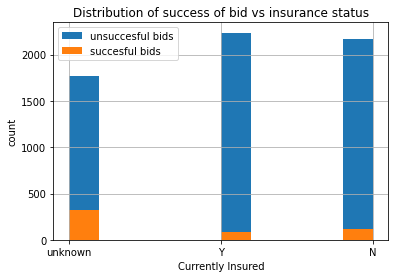

In [8]:
unsuccesful_bids_df['Currently Insured'].hist(label='unsuccesful bids')
succesful_bids_df['Currently Insured'].hist(label='succesful bids')
plt.title('Distribution of success of bid vs insurance status')
plt.xlabel('Currently Insured')
plt.ylabel('count')
plt.legend()

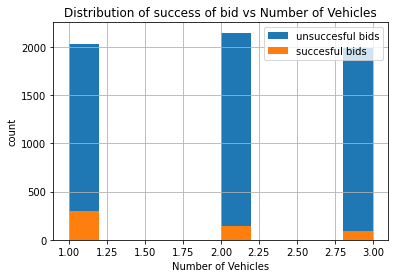

In [9]:
unsuccesful_bids_df['Number of Vehicles'].hist(label='unsuccesful bids')
succesful_bids_df['Number of Vehicles'].hist(label='succesful bids')
plt.title('Distribution of success of bid vs Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('count')
plt.legend()

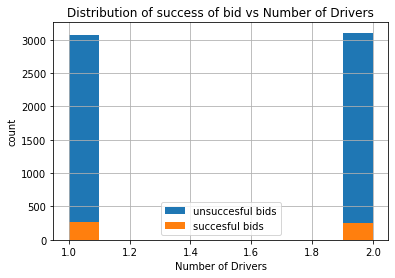

In [10]:
unsuccesful_bids_df['Number of Drivers'].hist(label='unsuccesful bids')
succesful_bids_df['Number of Drivers'].hist(label='succesful bids')
plt.title('Distribution of success of bid vs Number of Drivers')
plt.xlabel('Number of Drivers')
plt.ylabel('count')
plt.legend()

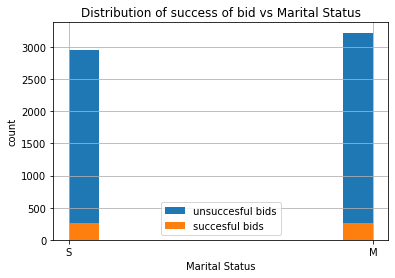

In [11]:
unsuccesful_bids_df['Marital Status'].hist(label='unsuccesful bids')
succesful_bids_df['Marital Status'].hist(label='succesful bids')
plt.title('Distribution of success of bid vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('count')
plt.legend()

We now want to extract all the different combinations of the features
1. Currently Insured
2. Number of Vehicles
3. Number of Drivers
4. Maritial Status
present in our training dataset and want to group our data by that.

In [12]:
set_of_combinations = set()
for i in train_data.values:
    set_of_combinations.add(tuple(i[:4]))

So we have 35 unique types. Now we will enumerate these types by converting this set to a list and then following that, we will add a column named 'feature_group' to our dataframe indicating which of these groups the row belongs to.

In [13]:
combinations_list = list(set_of_combinations)
_ = [print(f"{idx}: {comb}") for idx,comb in enumerate(combinations_list)]

0: ('N', 1, 2, 'M')
1: ('Y', 3, 2, 'M')
2: ('Y', 1, 2, 'S')
3: ('unknown', 1, 2, 'S')
4: ('Y', 3, 1, 'S')
5: ('unknown', 3, 2, 'M')
6: ('N', 2, 1, 'S')
7: ('Y', 2, 1, 'S')
8: ('unknown', 2, 2, 'S')
9: ('N', 3, 2, 'M')
10: ('N', 1, 1, 'S')
11: ('unknown', 3, 1, 'S')
12: ('N', 3, 1, 'S')
13: ('Y', 3, 1, 'M')
14: ('Y', 1, 2, 'M')
15: ('N', 2, 1, 'M')
16: ('Y', 1, 1, 'S')
17: ('unknown', 1, 2, 'M')
18: ('Y', 2, 1, 'M')
19: ('N', 1, 1, 'M')
20: ('unknown', 2, 2, 'M')
21: ('unknown', 1, 1, 'S')
22: ('unknown', 3, 1, 'M')
23: ('N', 3, 1, 'M')
24: ('N', 2, 2, 'S')
25: ('Y', 2, 2, 'S')
26: ('N', 1, 2, 'S')
27: ('unknown', 2, 1, 'S')
28: ('Y', 1, 1, 'M')
29: ('Y', 3, 2, 'S')
30: ('N', 3, 2, 'S')
31: ('unknown', 1, 1, 'M')
32: ('N', 2, 2, 'M')
33: ('unknown', 2, 1, 'M')
34: ('Y', 2, 2, 'M')


In [20]:
train_data = train_data.copy()
train_data['feature_group'] = -1

for i in range(len(combinations_list)):
    train_data.loc[(train_data['Currently Insured'] == combinations_list[i][0]) &
               (train_data['Number of Vehicles'] == combinations_list[i][1]) &
               (train_data['Number of Drivers'] == combinations_list[i][2]) &
               (train_data['Marital Status'] == combinations_list[i][3]),'feature_group'] = i

And that seems to have worked as we expected.

In [21]:
train_data.head()

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold,feature_group
1858,unknown,3,1,S,10.0,3,False,0,11
5061,unknown,1,1,M,10.0,2,False,0,31
8359,Y,1,2,M,10.0,4,False,0,14
6563,N,1,2,M,10.0,3,False,0,0
8888,N,2,2,S,10.0,5,False,0,24
